                                           image_path  label label_name  \
39  /content/flower_photos_new/003.roses/003_0383.jpg      2      roses   

                                              heatmap  
39  cnumpy.core.multiarray\n_reconstruct\np1\n(cnu...  

----Result----
/Users/Miyeah/Downloads/flower_photos_new/003.roses/003_0383.jpg
roses
[[0.02254852 0.02242267 0.02229683 ... 0.02535588 0.02535588 0.02535588]
 [0.02262184 0.02249475 0.02236765 ... 0.02565115 0.02565115 0.02565115]
 [0.02269517 0.02256682 0.02243846 ... 0.02594643 0.02594643 0.02594643]
 ...
 [0.01147656 0.01075927 0.01004199 ... 0.02110958 0.02110958 0.02110958]
 [0.01147656 0.01075927 0.01004199 ... 0.02110958 0.02110958 0.02110958]
 [0.01147656 0.01075927 0.01004199 ... 0.02110958 0.02110958 0.02110958]]


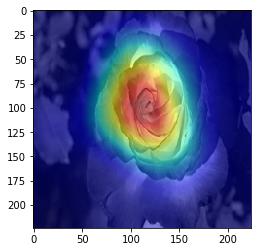

In [1]:
import pandas as pd
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.transform
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

# Use Columbia Lionmail account to view and download those data.
# Flower dataset:
# https://drive.google.com/file/d/1HRTIVM6lyalQuF07V2eKywwMA5BJcSJh/view?usp=sharing
# Testsets pickle
# https://drive.google.com/file/d/1n0ilgTl5ODQslNTQ0L2SVX7nfEpZrtiG/view?usp=sharing
# Trainsets pickle
# https://drive.google.com/file/d/1m8DlDpvhtie8tjd4TS9O-n0Miw0KxfSp/view?usp=sharing

def load_image( path ):
    try:
        img = skimage.io.imread( path )
    except Exception as e:
        print(e)
        return None

    img = skimage.color.rgb2lab(img)
    img[:,:,2] = 0
    img[:,:,1] = 0
    img = skimage.color.lab2rgb(img)

    if img is None: return None
    if len(img.shape) < 2: return None
    if len(img.shape) == 4: return None
    if len(img.shape) == 2: img=np.tile(img[:,:,None], 3)
    if img.shape[2] == 4: img=img[:,:,:3]
    if img.shape[2] > 4: return None

    resized_img = skimage.transform.resize( img, [224,224] , mode='constant')
    return resized_img


#How to use heatmap

#NOTES: 35 test samples per class, 175 test samples in total
#NOTES: 699 train samples per class, 3495 train samples in total
data = pd.read_pickle("/Users/Miyeah/Downloads/testset-final.pickle")
#data = pd.read_pickle("/Users/Miyeah/Downloads/trainset-final.pickle")

#change image index at you will
record_idx = random.randint(1, 175)
record = data[record_idx:record_idx+1]
print(record)
#path to flower_photos_new
path = record["image_path"].values[0].replace("/content/","/Users/Miyeah/Downloads/")
label_name = record["label_name"].values[0]
raw = record["heatmap"].values[0]
heatmap = cPickle.loads(bytes(raw, "utf-8"), encoding="bytes")
print()
print("----Result----")
print(path)
print(label_name)

#heatmap raw data
print(heatmap)

img = load_image(path)
plt.imshow(img)
# plt.imshow( heatmap, cmap=plt.cm.gray, alpha=0.5 )
plt.imshow( heatmap, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
plt.show()